__Objective of this program:-__

Our task is to analyse the tweets of Individual Twitter account in term of Subjectivity and Polarity.We will identify individual tweets as positive, negative and neutral. Calculate the percentage of positive and negative tweets 

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [1]:
# pip install tweepy
# pip install textblob
# pip install wordcloud
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                         ## Regular Expression Operations
plt.style.use('fivethirtyeight')


In [4]:
## To read login data file
log=pd.read_csv('C:/Users/admin/Downloads/macintoshtwitter.csv')
#log=pd.read_csv('https://raw.githubusercontent.com/dprakash05/twitter-login-csv-file/main/macintoshtwitter.csv?token=AUQGJCQXJHHZ7JST7MF3WRLBR256K')
consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [ ]:
## create authentication object
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)


In [5]:
## set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)

In [6]:
## create API object while passing in auth information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [7]:
## extract 200 tweeets from user account 
post=api.user_timeline(screen_name='narendramodi',count=200 ,tweet_mode='extended')


In [14]:
cursor=tweepy.Cursor(api.user_timeline,screen_name='narendramodi',tweet_mode='extended').items(1)
for i in cursor:     ## you have to run previous code everytime to run this code
    print(dir(i)) ## list of  directories in post like full_text,id,lang etc
    print("language is:",i.lang)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
language is: en


In [16]:
##  we can search quotes, hashtags, trending items also insted of some user name
cursor=tweepy.Cursor(api.search_tweets  ,q='Bitcoin',tweet_mode='extended').items(5)
for i in cursor:   
    print(i.full_text)

RT @LuoshengPeng: Have you tried $MARA? A #Bitcoin miner better than $BTC $ETH, up 600%+ YTD. Keep going up &amp; more as $BTC looks to break o…
RT @GoingParabolic: BREAKING🔥🔥🔥

The SEC has rejected VanEck’s spot #Bitcoin ETF application.
RT @MMCrypto: There are 7‘000 BILLION Dollar institutions in the world. A 100 are invested in #Bitcoin only.

This rocket 🚀 has just starte…
RT @NftDuche: 😍NFTs airdrop of the "Bitcoin History..." collection.
🥂The first 100 to complete these 3 steps will win one NFT!
🏃‍♂️Follow @…
RT @Bitcoin: $8 gasoline... https://t.co/kAyEJK1zE3


In [17]:
## print recent 5 tweets from account
print('showing 5 recent tweeets: \n')
i=1
for tweet in post[:5]:    ## way of extracting recent 5 tweets
    
        print(str(i)+')'+tweet.full_text + '\n' )
        i+=1

showing 5 recent tweeets: 

1)Ensuring last mile financial inclusion and digital empowerment... https://t.co/RtiU0kc3fI

2)Moving towards a ‘One Nation, One Ombudsman’ system, which is in line with our ‘Investors First’ commitment. https://t.co/wYsXZdee61

3)The Government of India is committed to boosting:

Financial inclusion.

Ease of access. 

Ease of investment.

Banking sector reforms. https://t.co/YySBjebnAZ

4)Grievance redressal system is most vital for a democracy.

The two RBI schemes launched today will make our grievance redressal systems even more effective. https://t.co/9KMiy3UAZb

5)Speaking at the launch of two customer centric initiatives of RBI. https://t.co/Xt4HGfz1Ut



In [18]:
## extracting english tweets from account
print('showing recent english tweeets: \n')
i=1
for tweet in post:
    if i<=5:    ## another way of extracting recent twweets
        if tweet.lang=='en':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1
        

showing recent english tweeets: 

1 ) Ensuring last mile financial inclusion and digital empowerment... https://t.co/RtiU0kc3fI

2 ) Moving towards a ‘One Nation, One Ombudsman’ system, which is in line with our ‘Investors First’ commitment. https://t.co/wYsXZdee61

3 ) The Government of India is committed to boosting:

Financial inclusion.

Ease of access. 

Ease of investment.

Banking sector reforms. https://t.co/YySBjebnAZ

4 ) Grievance redressal system is most vital for a democracy.

The two RBI schemes launched today will make our grievance redressal systems even more effective. https://t.co/9KMiy3UAZb

5 ) Speaking at the launch of two customer centric initiatives of RBI. https://t.co/Xt4HGfz1Ut



In [19]:
## create dataframe with column name tweets
df=pd.DataFrame([tweet.full_text for tweet in post if tweet.lang=='en'], columns=['Tweets'])
df.head()

,Tweets
0,Ensuring last mile financial inclusion and dig...
1,"Moving towards a ‘One Nation, One Ombudsman’ s..."
2,The Government of India is committed to boosti...
3,Grievance redressal system is most vital for a...
4,Speaking at the launch of two customer centric...


In [20]:
## Clean up the text
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)       ## removing RT followed by space
    #df=df[~df.Tweets.str.contains('RT')]   ---> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing http and https 
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)   ## applying function
## clean Text
df

,Tweets
0,Ensuring last mile financial inclusion and dig...
1,"Moving towards a ‘One Nation, One Ombudsman’ s..."
2,The Government of India is committed to boosti...
3,Grievance redressal system is most vital for a...
4,Speaking at the launch of two customer centric...
...,...
144,Thank you for your kind words. Agree with yo...
145,Thank you for your kind words. We continue to...
146,Thank You Mr. _shahid for your warm words of e...
147,Thank you PM for your kind words. Our two cou...


In [21]:
## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

## show new Dataframe
df

,Tweets,Subjectivity,Polarity
0,Ensuring last mile financial inclusion and dig...,0.022222,0.000000
1,"Moving towards a ‘One Nation, One Ombudsman’ s...",0.333333,0.250000
2,The Government of India is committed to boosti...,0.000000,0.000000
3,Grievance redressal system is most vital for a...,0.550000,0.425000
4,Speaking at the launch of two customer centric...,0.100000,0.000000
...,...,...,...
144,Thank you for your kind words. Agree with yo...,0.900000,0.600000
145,Thank you for your kind words. We continue to...,0.900000,0.600000
146,Thank You Mr. _shahid for your warm words of e...,0.600000,0.600000
147,Thank you PM for your kind words. Our two cou...,0.611111,0.408333


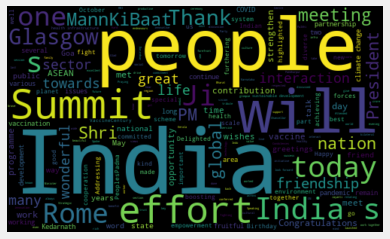

In [22]:
## plot word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear' )
plt.axis('off')
plt.show()

In [23]:
## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Ensuring last mile financial inclusion and dig...,0.022222,0.000000,Neutral
1,"Moving towards a ‘One Nation, One Ombudsman’ s...",0.333333,0.250000,Positive
2,The Government of India is committed to boosti...,0.000000,0.000000,Neutral
3,Grievance redressal system is most vital for a...,0.550000,0.425000,Positive
4,Speaking at the launch of two customer centric...,0.100000,0.000000,Neutral
...,...,...,...,...
144,Thank you for your kind words. Agree with yo...,0.900000,0.600000,Positive
145,Thank you for your kind words. We continue to...,0.900000,0.600000,Positive
146,Thank You Mr. _shahid for your warm words of e...,0.600000,0.600000,Positive
147,Thank you PM for your kind words. Our two cou...,0.611111,0.408333,Positive


In [24]:
## negative Tweets in dataframe
df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Tweets,Subjectivity,Polarity,Analysis
25,"Spoke to Tamil Nadu CM, Thiru and discussed t...",0.750000,-0.100000,Negative
30,Anguished by the loss of lives due to a fire i...,0.375000,-0.125000,Negative
34,"A few years ago, Kedarnath witnessed a horrifi...",0.500000,-0.366667,Negative
73,Kerala Piravi day greetings to the people of K...,0.450000,-0.050000,Negative
75,Landed in Glasgow. Will be joining the Summit...,0.375000,-0.125000,Negative
82,"Birthday wishes to my Ministerial colleague, S...",0.575000,-0.025000,Negative
91,At the Summit in Rome with other world leaders.,0.375000,-0.125000,Negative
110,"With the blessings of the people, has got the...",0.487500,-0.037500,Negative
113,The Ayushman Bharat Health Infrastructure Miss...,0.275000,-0.084375,Negative
126,100 crore vaccinations is a very big number an...,0.232857,-0.028571,Negative


In [25]:
## positive Tweets in Dataframe
df[df.Analysis=='Positive']   ## Another way indexing

,Tweets,Subjectivity,Polarity,Analysis
1,"Moving towards a ‘One Nation, One Ombudsman’ s...",0.333333,0.250000,Positive
3,Grievance redressal system is most vital for a...,0.550000,0.425000,Positive
5,"At 11 AM tomorrow, 12th November, two innovati...",0.375000,0.150000,Positive
6,Dulari Devi Ji is among those who has been con...,0.900000,0.700000,Positive
7,My mind goes back to the many interactions I h...,0.312500,0.325000,Positive
...,...,...,...,...
144,Thank you for your kind words. Agree with yo...,0.900000,0.600000,Positive
145,Thank you for your kind words. We continue to...,0.900000,0.600000,Positive
146,Thank You Mr. _shahid for your warm words of e...,0.600000,0.600000,Positive
147,Thank you PM for your kind words. Our two cou...,0.611111,0.408333,Positive


In [26]:
## print all positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       ## we want only rows
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1
    

1)Moving towards a ‘One Nation, One Ombudsman’ system, which is in line with our ‘Investors First’ commitment. 

2)Grievance redressal system is most vital for a democracy.

The two RBI schemes launched today will make our grievance redressal systems even more effective. 

3)At 11 AM tomorrow, 12th November, two innovative customer centric initiatives of RBI would be launched. They are:

RBI Retail Direct Scheme. 

Reserve Bank - Integrated Ombudsman Scheme. 

These schemes will benefit several of our citizens. 

4)Dulari Devi Ji is among those who has been conferred the PeoplesPadma. She is a talented artist who hails from Madhubani in Bihar.

During the informal interaction with the awardees after the ceremony, she presented to me her artwork. Humbled by her gesture. My gratitude to her. 

5)My mind goes back to the many interactions I had with Shri Anand Shankar Pandya Ji. It was a delight to hear from him several anecdotes of his interactions with great freedom fighters and insight

In [27]:
## print negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):       ## we want only rows
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Spoke to Tamil Nadu CM, Thiru  and discussed the situation in the wake of heavy rainfall in parts of the state. Assured all possible support from the Centre in rescue and relief work. I pray for everyone’s well-being and safety.

2)Anguished by the loss of lives due to a fire in a hospital in Ahmednagar, Maharashtra. Condolences to the bereaved families. May the injured recover at the earliest.

3)A few years ago, Kedarnath witnessed a horrific natural calamity. That time, questions were raised on whether Kedarnath can rise again or not?

Powered by a collective spirit, Kedarnath’s glory has been restored. 

4)Kerala Piravi day greetings to the people of Kerala. Kerala is widely admired for its picturesque surroundings and the industrious nature of its people. May the people of Kerala succeed in their various endeavours.

5)Landed in Glasgow. Will be joining the  Summit, where I look forward to working with other world leaders on mitigating climate change and articulating India’s eff

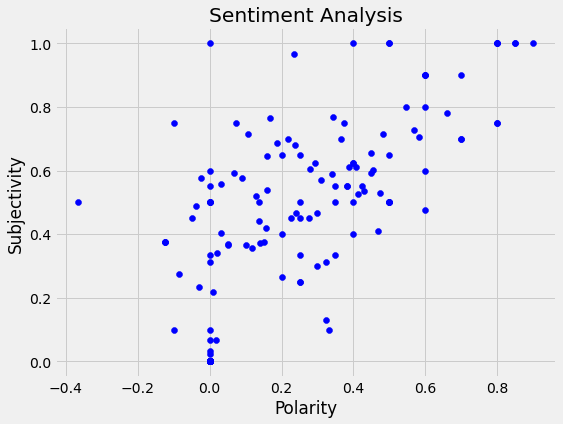

In [28]:
## plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [29]:
## get percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

66.4

In [30]:
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']

round((ntweets.shape[0]/df.shape[0])*100,1)

7.4

In [31]:
## show value counts
df['Analysis'].value_counts()

Positive    99
Neutral     39
Negative    11
Name: Analysis, dtype: int64

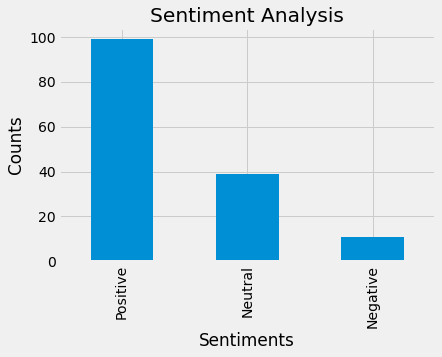

In [32]:
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [33]:
####   Additional some more data cleaning and making pie chart out of it.

In [34]:
##  checking how many birthday wishes are there
i=1
for tweet in post:
    mystr='Birthday'
    if mystr in tweet.full_text :
        print(str(i),')',tweet.full_text + '\n' )
        i+=1

1 ) Birthday greetings to respected Advani Ji. Praying for his long and healthy life. The nation remains indebted to him for his numerous efforts towards empowering people and enhancing our cultural pride. He is also widely respected for his scholarly pursuits and rich intellect.

2 ) Birthday wishes to my Ministerial colleague, Shri @sarbanandsonwal Ji. He is spearheading India’s strides in achieving port-led development as well as boosting the shipping sector. He is also making efforts to popularise traditional forms of medicine. Praying for his long life.

3 ) Birthday greetings to Minister Shri @ianuragthakur. I have known him for many years and seen his hard work from the days when he was a young Karyakarta to the present when he is working to improve sporting standards and furthering youth empowerment. Praying for his long life.



In [35]:
##  checking how many Congratulations tweets are there
i=1
for tweet in post:
    mystr='Congratulations '
    if mystr in tweet.full_text :
        print(str(i),')',tweet.full_text + '\n' )
        i+=1

1 ) Congratulations to @realmanubhaker, @SarnobatRahi, @SChaudhary2002 and @abhishek_70007 for wining medals at the @ISSF_Shooting President’s Cup in Poland. The people of India are proud of their stupendous performance. Best wishes to these athletes for their future endeavours. https://t.co/7hyHnDs0yM

2 ) Congratulations to Shivani, Anju, Divya, Radhika and Nisha for winning medals at the Wrestling Championships in Belgrade. Their performance is special and will contribute to wrestling becoming even more popular across India. https://t.co/pI6aByu2ZB

3 ) Congratulations to those who were conferred the #PeoplesPadma at the two ceremonies held today. They have made pioneering contributions across diverse sectors and done great service to humanity. https://t.co/ybSYIWidy4

4 ) Attended the Padma Awards ceremony earlier this evening. Congratulations to those who have been conferred the #PeoplesPadma. https://t.co/DUpuO1YC4Z

5 ) Delighted that beautiful Srinagar joins the @UNESCO Creativ

In [36]:
##  checking how many tweets are having India word 
i=1
for tweet in post:
    #mystr1='India'
    if 'India' in tweet.full_text :
        print(str(i),')',tweet.full_text + '\n' )
        i+=1

1 ) The Government of India is committed to boosting:

Financial inclusion.

Ease of access. 

Ease of investment.

Banking sector reforms. https://t.co/YySBjebnAZ

2 ) Shri Anand Shankar Pandya Ji was a prolific author and public intellectual who wrote extensively on history, public policy and spirituality. He was passionate about India’s growth. He was active in the VHP and worked selflessly towards social service. Saddened by his demise.

3 ) Acharya Kripalani was at the forefront of India’s freedom struggle under Bapu’s leadership. He had a great vision for our nation and worked to fulfil it as MP. He made immense contributions towards environmental protection and social empowerment. Remembering him on his Jayanti.

4 ) Congratulations to @realmanubhaker, @SarnobatRahi, @SChaudhary2002 and @abhishek_70007 for wining medals at the @ISSF_Shooting President’s Cup in Poland. The people of India are proud of their stupendous performance. Best wishes to these athletes for their future en

In [37]:
df1=pd.DataFrame([tweet.full_text for tweet in post if 'India' in tweet.full_text ], columns=['India_Tweets'])
df1.head()

,India_Tweets
0,The Government of India is committed to boosti...
1,Shri Anand Shankar Pandya Ji was a prolific au...
2,Acharya Kripalani was at the forefront of Indi...
3,"Congratulations to @realmanubhaker, @SarnobatR..."
4,"Congratulations to Shivani, Anju, Divya, Radhi..."


In [38]:
df2=pd.DataFrame([tweet.full_text for tweet in post if 'Congratulations' in tweet.full_text ], columns=['Cong_Tweets'])
df2.head()

,Cong_Tweets
0,"Congratulations to @realmanubhaker, @SarnobatR..."
1,"Congratulations to Shivani, Anju, Divya, Radhi..."
2,Congratulations to those who were conferred th...
3,Attended the Padma Awards ceremony earlier thi...
4,Delighted that beautiful Srinagar joins the @U...


In [39]:
df3=pd.DataFrame([tweet.full_text for tweet in post if 'Birthday' in tweet.full_text ], columns=['Birthday_Tweets'])
df3.head()

,Birthday_Tweets
0,Birthday greetings to respected Advani Ji. Pra...
1,"Birthday wishes to my Ministerial colleague, S..."
2,Birthday greetings to Minister Shri @ianuragth...


In [40]:
df4 = pd.concat([df1,df2, df3], axis=1)
df4

,India_Tweets,Cong_Tweets,Birthday_Tweets
0,The Government of India is committed to boosti...,"Congratulations to @realmanubhaker, @SarnobatR...",Birthday greetings to respected Advani Ji. Pra...
1,Shri Anand Shankar Pandya Ji was a prolific au...,"Congratulations to Shivani, Anju, Divya, Radhi...","Birthday wishes to my Ministerial colleague, S..."
2,Acharya Kripalani was at the forefront of Indi...,Congratulations to those who were conferred th...,Birthday greetings to Minister Shri @ianuragth...
3,"Congratulations to @realmanubhaker, @SarnobatR...",Attended the Padma Awards ceremony earlier thi...,NaN
4,"Congratulations to Shivani, Anju, Divya, Radhi...",Delighted that beautiful Srinagar joins the @U...,NaN
5,Attended the @BJP4India National Executive Mee...,Attended the first of the Padma Award ceremoni...,NaN
6,Pandharpur has a special place in the hearts a...,Well done Akash! Congratulations for the prest...,NaN
7,Our armed forces represent India’s diversity a...,NaN,NaN
8,Departing from Glasgow after two days of inten...,NaN,NaN
9,"Glad to have met, yet again, PM @naftalibennet...",NaN,NaN


In [41]:
df4["India_Tweets"].value_counts().sum()  ## noumber of tweet having word india 

57

In [42]:
df4["Cong_Tweets"].value_counts().sum()

7

In [43]:
df4["Birthday_Tweets"].value_counts().sum()

3

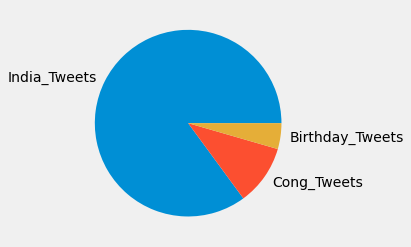

In [44]:
## plotting pie chart showing tweets conataning word like birthday, congratulation andd india
df5 = pd.DataFrame({
    'tweet': ['India_Tweets', 'Cong_Tweets', 'Birthday_Tweets'],
    'count': [df4["India_Tweets"].value_counts().sum(), df4["Cong_Tweets"].value_counts().sum(), df4["Birthday_Tweets"].value_counts().sum(), ]
    })
    
plt.pie(df5["count"], labels=df5["tweet"])
plt.show()

---------------> __PROJECT END__  <------------------